<a href="https://colab.research.google.com/github/safry4/MASK-RCNN/blob/main/DashBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### **Upload files**

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving D_COND_07_H66[44].csv to D_COND_07_H66[44].csv
Saving DA_COND_07_H66[96].csv to DA_COND_07_H66[96].csv
User uploaded file "D_COND_07_H66[44].csv" with length 6499 bytes
User uploaded file "DA_COND_07_H66[96].csv" with length 6898 bytes


In [4]:
Donor = pd.read_csv('/content/D_COND_07_H66[44].csv')
Donor_Acceptor = pd.read_csv('/content/DA_COND_07_H66[96].csv')

### **Original Donor data**

In [5]:
Donor.style.set_sticky(axis=1)

,Date,Sample,ROI,Phase Tau(ns),Phase SD,Modulation Tau(ns),Modulation SD,Intensity (Avg),Intensity (Max:247.5),Sample Modulation,Bleaching,Threshold(%),Threshold,Comment,Camera,Reference,Sample.1,Lifetime,Mapping,Cellule,Exposure(ms),Position_X,Position_Y,Position_Z,Unnamed: 24,Unnamed: 25
0,09/08/2019 16:11:55,D_COND_07_H66.1,1,2.120000,0.090000,3.870000,0.310000,14526,24678,0.700000,0.230000,5,3276,Comment,D_COND_07_H661_C.fli,D_COND_07_H661_R.fli,D_COND_07_H661_S.fli,D_COND_07_H661_L.fli,D_COND_07_H66.827,1,800,6740.600000,2437.400000,2873.480000,nan,nan
1,09/08/2019 16:13:05,D_COND_07_H66.2,1,1.960000,0.100000,3.970000,0.230000,12947,22058,0.690000,0.220000,5,3276,Comment,D_COND_07_H662_C.fli,D_COND_07_H662_R.fli,D_COND_07_H662_S.fli,D_COND_07_H662_L.fli,D_COND_07_H66.827,2,800,5222.900000,2648.100000,2878.480000,nan,nan
2,09/08/2019 16:14:16,D_COND_07_H66.3,1,1.970000,0.090000,3.890000,0.210000,15020,25715,0.700000,0.220000,5,3276,Comment,D_COND_07_H663_C.fli,D_COND_07_H663_R.fli,D_COND_07_H663_S.fli,D_COND_07_H663_L.fli,D_COND_07_H66.827,3,800,5703.900000,2550.700000,2879.030000,nan,nan
3,09/08/2019 16:15:27,D_COND_07_H66.4,1,1.980000,0.080000,3.810000,0.180000,18745,32068,0.700000,0.210000,5,3276,Comment,D_COND_07_H664_C.fli,D_COND_07_H664_R.fli,D_COND_07_H664_S.fli,D_COND_07_H664_L.fli,D_COND_07_H66.827,4,800,6465.200000,2679.200000,2880.950000,nan,nan
4,09/08/2019 16:16:38,D_COND_07_H66.5,1,1.740000,0.240000,3.670000,0.640000,22621,37460,0.720000,0.230000,5,3276,Comment,D_COND_07_H665_C.fli,D_COND_07_H665_R.fli,D_COND_07_H665_S.fli,D_COND_07_H665_L.fli,D_COND_07_H66.827,5,800,6700.200000,2679.200000,2878.550000,nan,nan
5,09/08/2019 16:17:49,D_COND_07_H66.6,1,1.990000,0.090000,3.840000,0.180000,18356,31513,0.700000,0.220000,5,3276,Comment,D_COND_07_H666_C.fli,D_COND_07_H666_R.fli,D_COND_07_H666_S.fli,D_COND_07_H666_L.fli,D_COND_07_H66.827,6,800,7153.600000,2811.300000,2881.330000,nan,nan
6,09/08/2019 16:18:59,D_COND_07_H66.7,1,1.750000,0.230000,3.580000,0.590000,22402,37664,0.730000,0.220000,5,3276,Comment,D_COND_07_H667_C.fli,D_COND_07_H667_R.fli,D_COND_07_H667_S.fli,D_COND_07_H667_L.fli,D_COND_07_H66.827,7,800,6792.200000,2811.300000,2882.580000,nan,nan
7,09/08/2019 16:20:10,D_COND_07_H66.8,1,1.980000,0.090000,3.960000,0.200000,15761,26867,0.690000,0.220000,5,3276,Comment,D_COND_07_H668_C.fli,D_COND_07_H668_R.fli,D_COND_07_H668_S.fli,D_COND_07_H668_L.fli,D_COND_07_H66.827,8,800,5341.300000,3028.400000,2878.080000,nan,nan
8,09/08/2019 16:21:20,D_COND_07_H66.9,1,1.950000,0.090000,3.750000,0.170000,19712,33940,0.710000,0.210000,5,3276,Comment,D_COND_07_H669_C.fli,D_COND_07_H669_R.fli,D_COND_07_H669_S.fli,D_COND_07_H669_L.fli,D_COND_07_H66.827,9,800,6579.300000,3051.800000,2881.330000,nan,nan
9,09/08/2019 16:22:32,D_COND_07_H66.10,1,1.890000,0.170000,3.670000,0.310000,19333,33450,0.720000,0.210000,5,3276,Comment,D_COND_07_H6610_C.fli,D_COND_07_H6610_R.fli,D_COND_07_H6610_S.fli,D_COND_07_H6610_L.fli,D_COND_07_H66.827,10,800,7199.400000,3051.800000,2880.600000,nan,nan


### **Original Donor - Acceptor data**

In [6]:
Donor_Acceptor.style.set_sticky(axis=1)

,Date,Sample,ROI,Phase Tau(ns),Phase SD,Modulation Tau(ns),Modulation SD,Intensity (Avg),Intensity (Max:247.5),Sample Modulation,Bleaching,Threshold(%),Threshold,Comment,Camera,Reference,Sample.1,Lifetime,Mapping,Cellule,Exposure(ms),Position_X,Position_Y,Position_Z,Unnamed: 24,Unnamed: 25
0,09/08/2019 18:29:37,DA_COND_07_H66.1,1,2.000000,0.140000,3.830000,0.270000,9044,15415,0.700000,0.250000,5,3276,Comment,DA_COND_07_H661_C.fli,DA_COND_07_H661_R.fli,DA_COND_07_H661_S.fli,DA_COND_07_H661_L.fli,DA_COND_07_H66.831,1,600,15948.100000,-4207.000000,2941.200000,nan,nan
1,09/08/2019 18:30:34,DA_COND_07_H66.2,1,1.940000,0.130000,3.810000,0.210000,12609,21708,0.700000,0.220000,5,3276,Comment,DA_COND_07_H662_C.fli,DA_COND_07_H662_R.fli,DA_COND_07_H662_S.fli,DA_COND_07_H662_L.fli,DA_COND_07_H66.831,2,600,16352.000000,-4088.100000,2943.700000,nan,nan
2,09/08/2019 18:31:30,DA_COND_07_H66.3,1,1.950000,0.110000,3.810000,0.170000,13401,23053,0.700000,0.220000,5,3276,Comment,DA_COND_07_H663_C.fli,DA_COND_07_H663_R.fli,DA_COND_07_H663_S.fli,DA_COND_07_H663_L.fli,DA_COND_07_H66.831,3,600,16130.700000,-4010.200000,2943.450000,nan,nan
3,09/08/2019 18:32:26,DA_COND_07_H66.4,1,1.930000,0.150000,3.740000,0.240000,14203,24594,0.710000,0.220000,5,3276,Comment,DA_COND_07_H664_C.fli,DA_COND_07_H664_R.fli,DA_COND_07_H664_S.fli,DA_COND_07_H664_L.fli,DA_COND_07_H66.831,4,600,16523.600000,-3967.900000,2942.850000,nan,nan
4,09/08/2019 18:33:22,DA_COND_07_H66.5,1,1.930000,0.110000,3.790000,0.180000,13957,24022,0.710000,0.220000,5,3276,Comment,DA_COND_07_H665_C.fli,DA_COND_07_H665_R.fli,DA_COND_07_H665_S.fli,DA_COND_07_H665_L.fli,DA_COND_07_H66.831,5,600,16889.400000,-3934.900000,2942.900000,nan,nan
5,09/08/2019 18:34:18,DA_COND_07_H66.6,1,1.920000,0.120000,3.890000,0.250000,11774,20200,0.700000,0.220000,5,3276,Comment,DA_COND_07_H666_C.fli,DA_COND_07_H666_R.fli,DA_COND_07_H666_S.fli,DA_COND_07_H666_L.fli,DA_COND_07_H66.831,6,600,18090.800000,-3617.500000,2946.900000,nan,nan
6,09/08/2019 18:35:15,DA_COND_07_H66.7,1,1.970000,0.100000,3.860000,0.160000,13887,23813,0.700000,0.220000,5,3276,Comment,DA_COND_07_H667_C.fli,DA_COND_07_H667_R.fli,DA_COND_07_H667_S.fli,DA_COND_07_H667_L.fli,DA_COND_07_H66.831,7,600,16193.600000,-3521.500000,2942.180000,nan,nan
7,09/08/2019 18:36:11,DA_COND_07_H66.8,1,2.000000,0.110000,3.900000,0.190000,13646,23351,0.700000,0.220000,5,3276,Comment,DA_COND_07_H668_C.fli,DA_COND_07_H668_R.fli,DA_COND_07_H668_S.fli,DA_COND_07_H668_L.fli,DA_COND_07_H66.831,8,600,15302.100000,-3514.500000,2940.830000,nan,nan
8,09/08/2019 18:37:07,DA_COND_07_H66.9,1,1.980000,0.100000,3.860000,0.160000,13723,23517,0.700000,0.220000,5,3276,Comment,DA_COND_07_H669_C.fli,DA_COND_07_H669_R.fli,DA_COND_07_H669_S.fli,DA_COND_07_H669_L.fli,DA_COND_07_H66.831,9,600,15770.200000,-3468.400000,2943.330000,nan,nan
9,09/08/2019 18:38:03,DA_COND_07_H66.10,1,1.970000,0.100000,3.810000,0.170000,14468,24884,0.700000,0.220000,5,3276,Comment,DA_COND_07_H6610_C.fli,DA_COND_07_H6610_R.fli,DA_COND_07_H6610_S.fli,DA_COND_07_H6610_L.fli,DA_COND_07_H66.831,10,600,16596.000000,-3395.000000,2944.750000,nan,nan


## **Choosing parameters**

### **1.Modulation Tau(ns)**

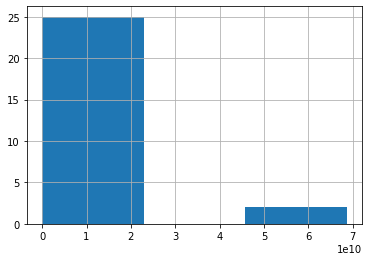

In [7]:
Donor['Modulation Tau(ns)'].hist(bins=3)
##add title, add hist for DA

### **FRET efficiency**

In [8]:
Donor.columns

Index(['Date', 'Sample', 'ROI', 'Phase Tau(ns)', 'Phase SD',
       'Modulation Tau(ns)', 'Modulation SD', 'Intensity (Avg)',
       'Intensity (Max:247.5)', 'Sample Modulation', 'Bleaching',
       'Threshold(%)', 'Threshold', 'Comment', 'Camera', 'Reference',
       'Sample.1', 'Lifetime', 'Mapping', 'Cellule', 'Exposure(ms)',
       'Position_X', 'Position_Y', 'Position_Z', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [9]:
FRET_ef = (1 - Donor['Phase Tau(ns)']/Donor_Acceptor['Phase Tau(ns)']) * 100

### **Summary**

In [10]:
#without heading
subset_Donor = Donor[['Phase Tau(ns)','Phase SD', 'Modulation Tau(ns)', 'Intensity (Avg)']].copy()
subset_Donor.columns = ['Phase Tau(ns)_D','Phase SD_D', 'Modulation Tau(ns)_D', 'Intensity (Avg)_D']

subset_Donor_Acceptor = Donor_Acceptor[['Phase Tau(ns)','Phase SD', 'Modulation Tau(ns)', 'Intensity (Avg)']].copy()
subset_Donor_Acceptor.columns = ['Phase Tau(ns)_DA','Phase SD_DA', 'Modulation Tau(ns)_DA', 'Intensity (Avg)_DA']

summary = pd.concat([subset_Donor, subset_Donor_Acceptor], axis=1)
summary['FRET_ef'] = (1 - Donor['Phase Tau(ns)']/Donor_Acceptor['Phase Tau(ns)']) * 100

summary

,Phase Tau(ns)_D,Phase SD_D,Modulation Tau(ns)_D,Intensity (Avg)_D,Phase Tau(ns)_DA,Phase SD_DA,Modulation Tau(ns)_DA,Intensity (Avg)_DA,FRET_ef
0,2.12,0.09,3.870000e+00,14526.0,2.00,0.14,3.83,9044,-6.000000
1,1.96,0.10,3.970000e+00,12947.0,1.94,0.13,3.81,12609,-1.030928
2,1.97,0.09,3.890000e+00,15020.0,1.95,0.11,3.81,13401,-1.025641
3,1.98,0.08,3.810000e+00,18745.0,1.93,0.15,3.74,14203,-2.590674
4,1.74,0.24,3.670000e+00,22621.0,1.93,0.11,3.79,13957,9.844560
5,1.99,0.09,3.840000e+00,18356.0,1.92,0.12,3.89,11774,-3.645833
6,1.75,0.23,3.580000e+00,22402.0,1.97,0.10,3.86,13887,11.167513
7,1.98,0.09,3.960000e+00,15761.0,2.00,0.11,3.90,13646,1.000000
8,1.95,0.09,3.750000e+00,19712.0,1.98,0.10,3.86,13723,1.515152
9,1.89,0.17,3.670000e+00,19333.0,1.97,0.10,3.81,14468,4.060914


### **App**

In [11]:
!pip install jupyter-dash
!pip install dash_bootstrap_components
import dash_bootstrap_components as dbc
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
!pip install dash-table
import dash_table

     |████████████████████████████████| 9.6 MB 6.6 MB/s 
     |████████████████████████████████| 357 kB 56.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=371067b24a61b10d0f518f8a31875a60550641b37d8dd83c38ac758d4728347d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
     |████████████████████████████████| 210 kB 5.0 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  # Remove the CWD from sys.path while we load stuff.


In [15]:
app = JupyterDash(__name__)

df = summary


app.layout = dbc.Container([
    dbc.Label('Summary'),
    dash_table.DataTable(df.to_dict('records'),[{"name": i, "id": i} for i in df.columns], id='tbl'),
    dash_table.DataTable(id='tb1', filter_action='native'),
    dbc.Alert(id='tbl_out'),
])

@app.callback(Output('tbl_out', 'children'), Input('tbl', 'active_cell'))

app.run_server(debug=True)

SyntaxError: ignored

In [ ]:
#colour
#all on one page
#add intensity and other
#add header

In [58]:
df = summary
app = JupyterDash(__name__)
df['id'] = df.index
app.layout = html.Div([
    html.H4('Summary', style={'font-weight': 'bold', 'textAlign': 'center'}),
    #html.Label('Summary', style={'font-weight': 'bold', 'textAlign': 'center'}),
    dash_table.DataTable(
        data=df.to_dict('records'),
        sort_action='native',
        id='datatable-interactivity',
        columns=[
            #{"name": i, "id": i, "deletable": True, "selectable": True} for i in df.columns


            ##
            {"name": ["Donor", "Phase Tau(ns)_D"], "id": "Phase Tau(ns)_D"},
            {"name": ["Donor", "Phase SD_D"], "id": "Phase SD_D"},
            {"name": ["Donor", "Modulation Tau(ns)_D"], "id": "Modulation Tau(ns)_D"},
            {"name": ["Donor", "Intensity (Avg)_D"], "id": "Intensity (Avg)_D"},

            {"name": ["Donor_Acceptor", "Phase Tau(ns)_DA"], "id": "Phase Tau(ns)_DA"},
            {"name": ["Donor_Acceptor", "Phase SD_DA"], "id": "Phase SD_DA"},
            {"name": ["Donor_Acceptor", "Modulation Tau(ns)_DA"], "id": "Modulation Tau(ns)_DA"},
            {"name": ["Donor_Acceptor", "Intensity (Avg)_DA"], "id": "Intensity (Avg)_DA"},
            {"name": ["", "FRET_ef"], "id": "FRET_ef"},
            ###
          ],
          merge_duplicate_headers=True,
          editable=True,
          # style_data_conditional=[
          #   {
          #     'if': {
          #         'column_id': "Phase Tau(ns)_D",
          #         #'column_id': 'Phase Tau(ns)_D', 'header_index': 0,
          #     },
          #     'backgroundColor': 'dodgerblue',
          #     'color': 'white'
          #   }
          # ],

          # style_cell_conditional=[
          # {
          #     'if': {'column_id': c},
          #     'textAlign': 'left'
          # } for c in ['Date', 'Region']
          # ],
          style_data={
              'color': 'black',
              'backgroundColor': 'white'
          },
          style_data_conditional=[
              {
                  'if': {'row_index': 'odd'},
                  'backgroundColor': 'rgb(220, 220, 220)',
              }
          ],
          # style_header={
          #     'backgroundColor': 'rgb(210, 210, 210)',
          #     'color': 'black',
          #     'fontWeight': 'bold'
          # }
          
          ###
          style_header_conditional=[
          { 'if': { 'column_id': 'Phase Tau(ns)_D', 'header_index': 1 }, 'backgroundColor': '#bfe5f5' },
          { 'if': { 'column_id': 'Phase SD_D', 'header_index': 1 }, 'backgroundColor': '#bfe5f5' },
          {'if': {'column_id': 'Modulation Tau(ns)_D', 'header_index': 1}, 'backgroundColor': '#bfe5f5'},
          {'if': {'column_id': 'Intensity (Avg)_D', 'header_index': 1}, 'backgroundColor': '#bfe5f5'},

          { 'if': { 'column_id': 'Phase Tau(ns)_DA', 'header_index': 1 }, 'backgroundColor': '#ebf7c8' },
          { 'if': { 'column_id': 'Phase SD_DA', 'header_index': 1 }, 'backgroundColor': '#ebf7c8' },
          {'if': {'column_id': 'Modulation Tau(ns)_DA', 'header_index': 1}, 'backgroundColor': '#ebf7c8'},
          {'if': {'column_id': 'Intensity (Avg)_DA', 'header_index': 1}, 'backgroundColor': '#ebf7c8'},

          {'if': {'column_id': 'FRET_ef', 'header_index': 1}, 'backgroundColor': '#f2da6f'}
          
          ],
          #merge_duplicate_headers=True,

          ###

          #data=df.to_dict('records'),
          #editable=True,
          filter_action="native",
          #sort_action="native",
          sort_mode="multi",
          column_selectable="single",
          row_selectable="multi",
          row_deletable=True,
          selected_columns=[],
          selected_rows=[],
          page_action="native",
          page_current= 0,
          page_size= 50,
      ),
    html.Div(id='datatable-interactivity-container')
])

@app.callback(
    Output('datatable-interactivity', 'style_data_conditional'),
    Input('datatable-interactivity', 'selected_columns')
)
def update_styles(selected_columns):
    return [{
        'if': { 'column_id': i },
        'background_color': '#D2F3FF'
    } for i in selected_columns]


app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
#round FRET
#check why FRET is neg
#check what columns to include

In [ ]:
'textAlign': 'center'